In [8]:
%pylab
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage
from nuclei_segmentation import otsu as ot
from nuclei_segmentation import dicescore as dsc
from nuclei_segmentation import preprocessing as pp
from nuclei_segmentation import local_thresholding as lt
from nuclei_segmentation import two_level_otsu as tlo

Using matplotlib backend: <object object at 0x00000258C8097070>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


c:\Users\ievas\anaconda3\envs\dataanalysis0104_env\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['figure', 'nan']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [88]:


def om(img,filtersize):
        img = lt.local_thresholding_mean(img, 50, filtersize)
        return img

def oc(img,filtersize):
        img = lt.local_thresholding_counts(img, 300, filtersize, 0.5)
        return img

def m(img, filtersize):
        img=scipy.ndimage.median_filter(img, filtersize)
        return img

def g(img, filtersize):
        img=scipy.ndimage.gaussian_filter(img, filtersize)
        return img
        
def s(img,filtersize):
        img=pp.stretch(img)
        return img


    #functions = [om, oc, m, g, s]#
def process(image_list, function, filtersize):
        list = []
        
        for i in range(0,len(image_list)):
                list.append(function(image_list[i], filtersize))

        return list



def dscs(img_list, gt_list):
        list=[]
        for j in range(0,len(img_list)):
                list.append(dsc.dice(img_list[j],gt_list[j]))
        return list

def bestdsc(list1,list2):
        if median(list1)>=median(list2):
                list=list1
        else:
                list=list2
        return list
def better_dsc(list1, list2):
        if bestdsc(list1, list2)==list1:
                name='mean'
        else:
                name='counts'
        return name

In [23]:
def complete_analysis_local_otsu(dataset):
    if dataset == "N2DH-GOWT1":
        img = []
        path = r"data/Otsu_data/N2DH-GOWT1/img"
        for f in os.listdir(path):
            img.append(imread(os.path.join(path , f)))

        gt = []
        path = r"data/Otsu_data/N2DH-GOWT1/gt"
        for f in os.listdir(path):
            gt.append(pp.binarize(imread(os.path.join(path , f))))
        
        mfiltersize = 9
        gfiltersize=9
       
        
    if dataset == "N2DL_HeLa":

        img = []
        path = r"data/Otsu_data/N2DL-HeLa/img"
        for f in os.listdir(path):
            img.append(imread(os.path.join(path , f)))

        gt = []
        path = r"data/Otsu_data/N2DL-HeLa/gt"
        for f in os.listdir(path):
            gt.append(pp.binarize(imread(os.path.join(path , f))))
        
        mfiltersize=2
        gfiltersize=4
        framesize=300


    if dataset == "NIH3T3":
        img = []
        path = r"data/Otsu_data/NIH3T3/img"
        for f in os.listdir(path):
            img.append(imread(os.path.join(path , f)))

        gt = []
        path = r"data/Otsu_data/NIH3T3/gt"
        for f in os.listdir(path):
            gt.append(imread(os.path.join(path , f)))

        mfiltersize=16
        gfiltersize=8
        framesize=200

    m_img = process(img,m, mfiltersize)
    print('m done')
    g_img = process(img,g,gfiltersize)
    print('g done')
    s_img = process(img,s,1)
    print('s done')
    sm_img = process(s_img,m,mfiltersize)
    print('sm done')
    sg_img = process(g_img,g,gfiltersize)
    print('sg done')
    om_img = process(img,om,framesize)
    print('om done')
    print(len(om_img))
    #oc_img = process(img,oc,framesize)
    print('oc done')
    #print(len(oc_img))
    mom = process(m_img,om,framesize)
    print('mom done')
    #moc = process(m_img,oc,framesize)
    print('moc done')
    gom = process(g_img,om,framesize)
    print('gom done')
    #goc = process(g_img,oc,framesize)
    print('goc done')
    som = process(s_img, om, framesize)
    print('som done')
    #soc = process(s_img, oc, framesize)
    print('soc done')
    smom = process(sm_img,om,framesize)
    print('smom done')
    #smoc = process(sm_img,oc,framesize)
    print('smoc done')
    sgom = process(sg_img,om,framesize)
    print('sgom done')
    #sgoc = process(sg_img,oc,framesize)
    print('sgoc done')

    #processed_list=[gt,om_img,oc_img,mom,moc,gom,goc,som,soc,smom,smoc,sgom,sgoc, dataset]
    processed_list=[gt,om_img,mom,gom,som,smom,sgom,dataset]

    return processed_list

def plotting(imglist):
    #dice score for o, mo,go,so,smo,sgo...:
    gt=imglist[0]
    gtlist=[]
    for i in range(0,len(gt)):
        gtlist.append(pp.binarize(gt[i]))

    list=[]
    i=1
    #while i < len(imglist)-2:
        #list.append(bestdsc(dscs(imglist[i], gtlist), dscs(imglist[i+1], gtlist)))
        #print(better_dsc(dscs(imglist[i], gtlist), (imglist[i+1], gtlist)))
        #i+=2

    while i<len(imglist)-1:
        list.append(dscs(imglist[i], gtlist))
        i+=1

    
    #data=[bestdsc(dscs(,gt),dscs(oc_img,gt)),bestdsc(dscs(mom, gt), dscs(moc, gt)), bestdsc(dscs(gom, gt), dscs(goc, gt)), bestdsc(dscs(som, gt), dscs(soc,gt)), bestdsc(dscs(smom,gt), dscs(smoc,gt)), bestdsc(dscs(sgom,gt), dscs(sgoc,gt))]
    #print('dscs done')
    #print(better_dsc(dscs(om_img,gt),dscs(oc_img,gt)), better_dsc(dscs(mom, gt), dscs(moc, gt)), better_dsc(dscs(gom, gt), dscs(goc, gt)), better_dsc(dscs(som, gt), dscs(soc,gt)), better_dsc(dscs(smom,gt), dscs(smoc,gt)), better_dsc(dscs(sgom,gt), dscs(sgoc,gt)))
    data=list
    return data

def boxplots(imglist):

       #dice score for o, mo,go,so,smo,sgo...:
    gt=imglist[0]
    gtlist=[]
    for i in range(0,len(gt)):
        gtlist.append(pp.binarize(gt[i]))

    list=[]
    i=1
    #while i < len(imglist)-2:
        #list.append(bestdsc(dscs(imglist[i], gtlist), dscs(imglist[i+1], gtlist)))
        #print(better_dsc(dscs(imglist[i], gtlist), (imglist[i+1], gtlist)))
        #i+=2

    while i<len(imglist)-1:
        list.append(dscs(imglist[i], gtlist))
        i+=1

    
    #data=[bestdsc(dscs(,gt),dscs(oc_img,gt)),bestdsc(dscs(mom, gt), dscs(moc, gt)), bestdsc(dscs(gom, gt), dscs(goc, gt)), bestdsc(dscs(som, gt), dscs(soc,gt)), bestdsc(dscs(smom,gt), dscs(smoc,gt)), bestdsc(dscs(sgom,gt), dscs(sgoc,gt))]
    #print('dscs done')
    #print(better_dsc(dscs(om_img,gt),dscs(oc_img,gt)), better_dsc(dscs(mom, gt), dscs(moc, gt)), better_dsc(dscs(gom, gt), dscs(goc, gt)), better_dsc(dscs(som, gt), dscs(soc,gt)), better_dsc(dscs(smom,gt), dscs(smoc,gt)), better_dsc(dscs(sgom,gt), dscs(sgoc,gt)))
    data=list

    boxplot_heading = 'Preprocessing methods - ' + imglist[-1]

    boxplot = pp.dataset_boxplot_otsu(data , boxplot_heading)
    return boxplot

   

    

    
    


    
    

    






In [28]:
image = imread(r'data/Otsu_data/NIH3T3/img/dna-0.png')
lt.local_thresholding_mean(image,50,150)
print('yeet')

yeet


In [24]:
comp=complete_analysis_local_otsu("N2DL_HeLa")


300
m done
g done


KeyboardInterrupt: 

In [8]:
img1=imread(r"data/Otsu_data/N2DL-HeLa/img/t13.tif")
img2=imread(r"data/Otsu_data/N2DL-HeLa/img/t52.tif")
img3=imread(r"data/Otsu_data/N2DL-HeLa/img/t75.tif")
img4=imread(r"data/Otsu_data/N2DL-HeLa/img/t79.tif")

imglist=[img1, img2, img3, img4]
gt1=imread(r"data/Otsu_data/N2DL-HeLa/gt/man_seg13.tif")
gt2=imread(r"data/Otsu_data/N2DL-HeLa/gt/man_seg52.tif")
gt3=imread(r"data/Otsu_data/N2DL-HeLa/gt/man_seg75.tif")
gt4=imread(r"data/Otsu_data/N2DL-HeLa/gt/man_seg79.tif")
gtlist=[gt1,gt2,gt3,gt4]

In [9]:
comp2=complete_analysis_local_otsu("NIH3T3")


c:\Users\ievas\Desktop\2022-topic-01-team-04\nuclei_segmentation\local_thresholding.py:86: RuntimeWarning: invalid value encountered in longlong_scalars
  w0 = w0_sum / sum(n)
c:\Users\ievas\Desktop\2022-topic-01-team-04\nuclei_segmentation\local_thresholding.py:94: RuntimeWarning: invalid value encountered in double_scalars
  v0 = v0_sum / sum(n[0:i+1])
c:\Users\ievas\Desktop\2022-topic-01-team-04\nuclei_segmentation\local_thresholding.py:101: RuntimeWarning: invalid value encountered in longlong_scalars
  w1 = w1_sum / sum(n)


KeyboardInterrupt: 

[[0.8360405998943934, 0.8586713648254943, 0.8530443098501753, 0.8177741282363493, 0.8399953520799442, 0.7654859679125818, 0.7626226465340046, 0.8117507395585859, 0.6133732199011787, 0.8168652812886423, 0.6705802157983013, 0.8324854215161623, 0.7741625333494337, 0.852313800900949, 0.8629962943356273, 0.7509333394598693, 0.7822342384515624, 0.8543158427409453], [0.648027510867795, 0.6735160929054876, 0.8594389095517252, 0.8193132123154465, 0.8413159834812786, 0.7651337174507434, 0.7673017616223016, 0.8111191972262652, 0.6228345392860359, 0.8186237024145417, 0.6993818037827463, 0.8371225745005335, 0.7657893790350135, 0.8526310951517515, 0.8608968328629665, 0.7592169279481041, 0.7963897325364946, 0.8544344979009261], [0.8962200307300733, 0.8989426460160811, 0.8695025495900206, 0.8302464955644342, 0.8451077044130257, 0.7706547534712384, 0.7650140326704611, 0.8237449636207865, 0.6310487817255204, 0.8276915418863927, 0.6989571319504232, 0.8449742531134451, 0.7528605141584013, 0.85615053666965

c:\Users\ievas\Desktop\2022-topic-01-team-04\nuclei_segmentation\preprocessing.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No preprocessing' , 'Median filter' , 'Gaussian filter' , 'Histogram \n stretching' , 'Histogram stretching and \n median filter' , 'Histogram stretching and \n gaussian filter'])


Line2D(_child6)


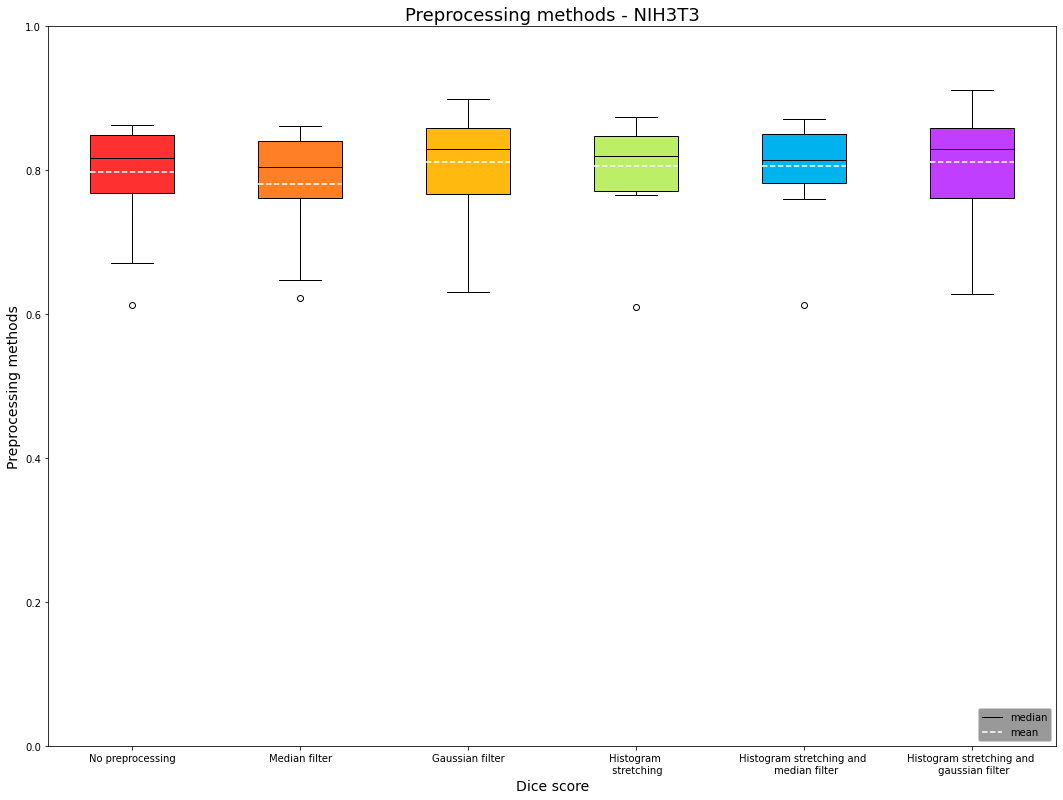

In [25]:
print(dices(comp2))
boxplots(comp2)

dice scores NIH3T3
- [[0.8360405998943934, 0.8586713648254943, 0.8530443098501753, 0.8177741282363493, 0.8399953520799442, 0.7654859679125818, 0.7626226465340046, 0.8117507395585859, 0.6133732199011787, 0.8168652812886423, 0.6705802157983013, 0.8324854215161623, 0.7741625333494337, 0.852313800900949, 0.8629962943356273, 0.7509333394598693, 0.7822342384515624, 0.8543158427409453], [0.648027510867795, 0.6735160929054876, 0.8594389095517252, 0.8193132123154465, 0.8413159834812786, 0.7651337174507434, 0.7673017616223016, 0.8111191972262652, 0.6228345392860359, 0.8186237024145417, 0.6993818037827463, 0.8371225745005335, 0.7657893790350135, 0.8526310951517515, 0.8608968328629665, 0.7592169279481041, 0.7963897325364946, 0.8544344979009261], [0.8962200307300733, 0.8989426460160811, 0.8695025495900206, 0.8302464955644342, 0.8451077044130257, 0.7706547534712384, 0.7650140326704611, 0.8237449636207865, 0.6310487817255204, 0.8276915418863927, 0.6989571319504232, 0.8449742531134451, 0.7528605141584013, 0.8561505366696526, 0.8763713293266667, 0.7599872900016538, 0.8034472654887425, 0.8600522692503825], [0.8421300498519737, 0.8743258892015092, 0.8497771352849054, 0.82481326588688, 0.8277184741976791, 0.7652556444112221, 0.7839976957834036, 0.8374803303796848, 0.6095192725842279, 0.8015904688266448, 0.7663976071863642, 0.8144494476383614, 0.766391339541255, 0.856452244919524, 0.8569971999613788, 0.7659680222327839, 0.7964881411925239, 0.8554899183971788], [0.8138529659139917, 0.8708399030323575, 0.8579168484910713, 0.8265330285721963, 0.8298658817713034, 0.7670961560308923, 0.7919058986727575, 0.83809070881561, 0.6129186723455732, 0.8032843988954079, 0.7651030963655677, 0.8148343334101878, 0.7596045922968061, 0.8563841648768236, 0.8543625331963479, 0.7791690412620692, 0.8111341828194034, 0.8541022838760732], [0.909851734525395, 0.9117883553247301, 0.8642202159617313, 0.8311333937141283, 0.8420626200068814, 0.7710455256051921, 0.7590575059124861, 0.8182634981946427, 0.6282697486177428, 0.8273864920561058, 0.7128379428216284, 0.8400582412248973, 0.7435017953802454, 0.8594178859443339, 0.8761816046626265, 0.7522463087392705, 0.806145953898524, 0.8588434821780346]]

In [94]:
comp=complete_analysis_local_otsu("N2DL_HeLa")


m done
g done
s done
sm done
sg done
om done
4
oc done


KeyboardInterrupt: 

In [86]:
dicelist = []
stepsize = 50
framesize = 300
for i in range(0,len(imglist)):
    dicelist.append(dsc.dice(lt.local_thresholding_mean(imglist[i], stepsize, framesize), gtlist[i]))
    print('done')
print(dicelist)


done
done
done
done
[0.9836436839456467, 0.974686950877804, 0.9617910207250661, 0.9712366996141916]


[[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)], [array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
  

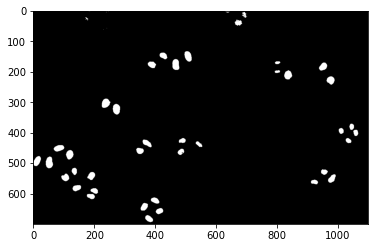

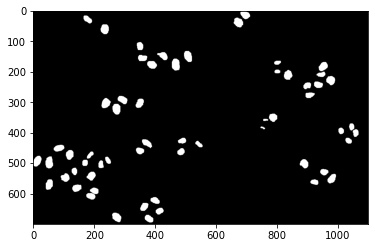

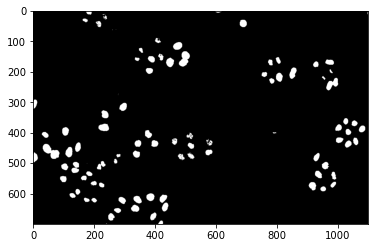

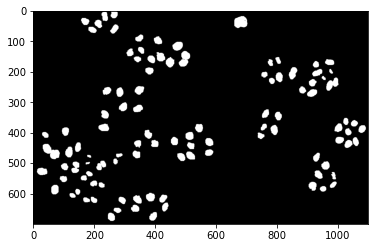

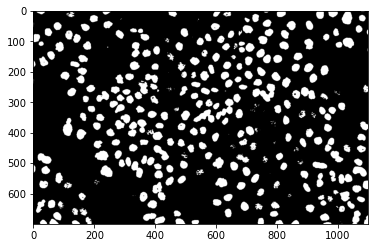

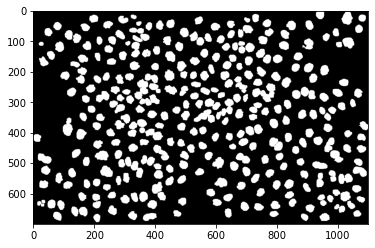

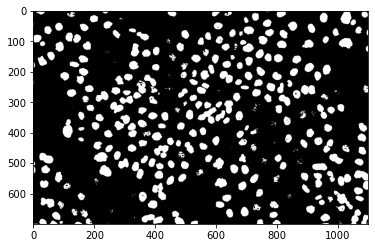

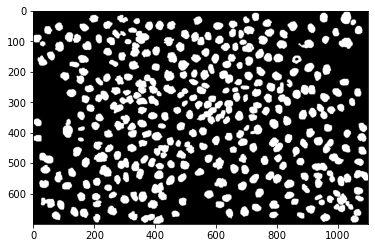

In [ ]:
print(comp)
i=0
while i<4:
    figure()
    imshow(comp[2][i], 'gray')
    figure()
    imshow(comp[0][i],'gray')
    i+=1



mean
mean
mean
mean
mean
mean
Line2D(_child6)


c:\Users\ievas\Desktop\2022-topic-01-team-04\nuclei_segmentation\preprocessing.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No preprocessing' , 'Median filter' , 'Gaussian filter' , 'Histogram \n stretching' , 'Histogram stretching and \n median filter' , 'Histogram stretching and \n gaussian filter'])


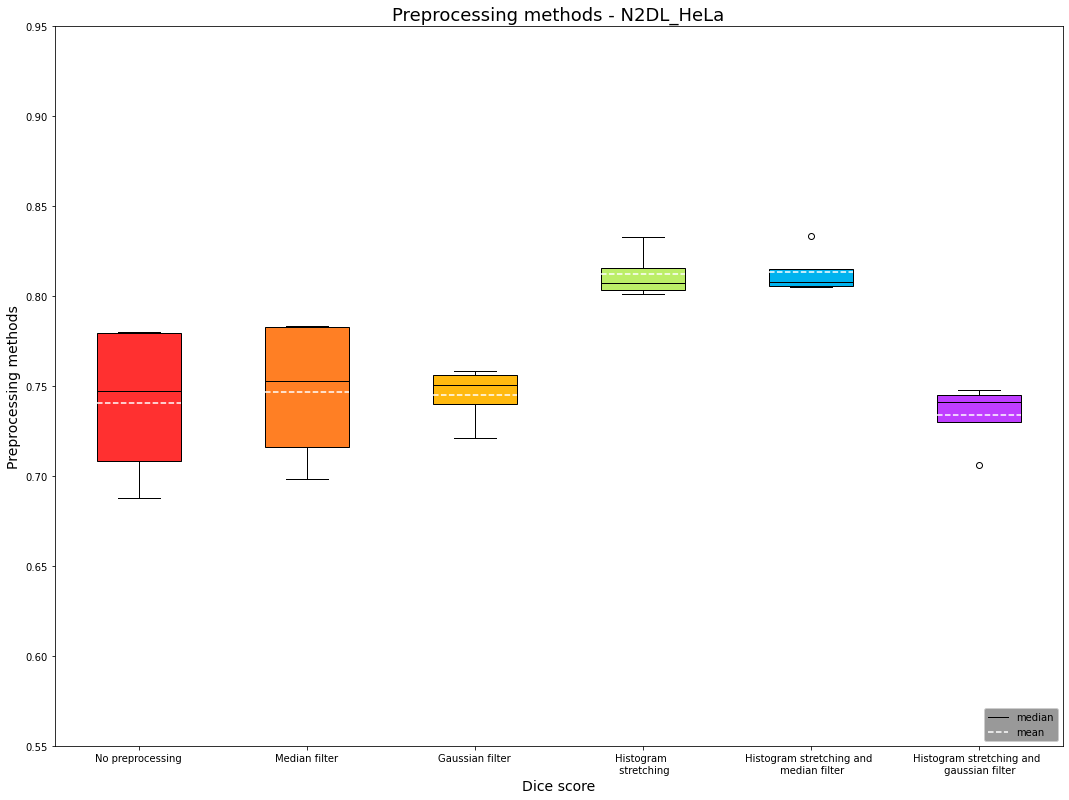

In [ ]:

plotting(comp)

In [11]:
from nuclei_segmentation import two_level_local_thresholding as tllt

dataset1_example = imread(r"data/Otsu_data/N2DH-GOWT1/img/t31.tif")



In [10]:
d1_tllt_c = tllt.two_level_local_thresholding_counts(dataset1_example,50,200,0.5)

NameError: name 'dataset1_example' is not defined

In [9]:
d1_tllt_m = tllt.two_level_local_thresholding_mean(dataset1_example,100,400)

NameError: name 'dataset1_example' is not defined

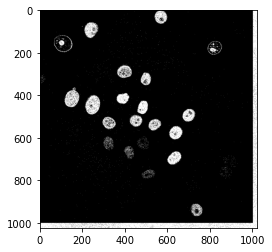

In [ ]:
imshow(d1_tllt_m, 'gray')

In [7]:
dataset2_example = imread(r"data/Otsu_data/N2DL-HeLa/img/t13.tif")



In [ ]:
d2_tllt_c = tllt.two_level_local_thresholding_counts(dataset2_example,50,200,0.5)

In [8]:
d2_tllt_m = tllt.two_level_local_thresholding_mean(dataset2_example,50,200)

c:\Users\ievas\Desktop\2022-topic-01-team-04\nuclei_segmentation\two_level_local_thresholding.py:34: RuntimeWarning: invalid value encountered in longlong_scalars
  w0 = w0_sum / sum(n)
c:\Users\ievas\Desktop\2022-topic-01-team-04\nuclei_segmentation\two_level_local_thresholding.py:47: RuntimeWarning: invalid value encountered in longlong_scalars
  w1 = w1_sum / sum(n)
c:\Users\ievas\Desktop\2022-topic-01-team-04\nuclei_segmentation\two_level_local_thresholding.py:59: RuntimeWarning: invalid value encountered in longlong_scalars
  w2 = w2_sum / sum(n)


IndexError: list index out of range

In [15]:
dataset3_example = imread(r"data/Otsu_data/NIH3T3/img/dna-32.png")



In [ ]:
d3_tllt_c = tllt.two_level_local_thresholding_counts(dataset3_example50,200,0.5)

In [14]:
d3_tllt_m = tllt.two_level_local_thresholding_mean(dataset3_example,50,150)

In [2]:
figure()
imshow(d1_tllt_m, 'gray')

NameError: name 'd1_tllt_m' is not defined

<Figure size 432x288 with 0 Axes>

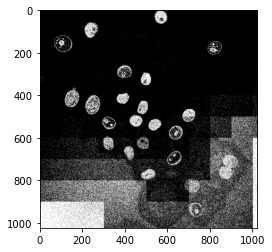

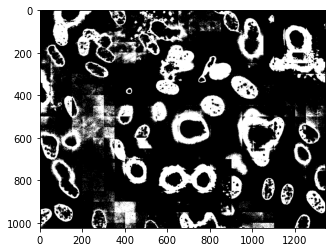

In [16]:
figure()
imshow(d1_tllt_m, 'gray')
figure()
imshow(d3_tllt_m, 'gray')

In [6]:
d4_tllt_m = tllt.two_level_local_thresholding_mean(dataset3_example,100,300)

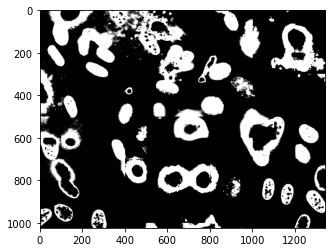

In [7]:
imshow(d4_tllt_m, 'gray')


In [25]:
#Packages
from matplotlib import figure
from matplotlib.pyplot import imshow
import numpy as np
from scipy import stats
from nuclei_segmentation import two_level_otsu
from cmath import nan 

# average threshold

def tlot(img,x):
    import matplotlib.pyplot
    import numpy

   # load histogram, Mathematische werte aus Histogramm rausgreifen
    n, bins = numpy.histogram(img.flatten(),bins = x)
  
   # initialize threshold value (T = 0) 
    thres = list()
    copy = img.copy()

    # create list to store values of within class variance for each threshold value
    wcv = list()
    threshold = list()
    # set up initial values
    for i in range(0,len(n)):
        for t in range(0,len(n)):
            
            #sum up the probabilites of each intensity value;  and the mean value (sind noch nicht happy mit der definition :()
            w0_sum = numpy.sum(numpy.array(n[0:i+1]))
            mean_sum0 = numpy.sum((numpy.array(bins[0:i+1])*numpy.array(n[0:i+1])))
                
            # background class probabilites and class mean levels
            #w0 = w0_sum / sum(n)  
            if(sum(n[0:i+1]) != 0):  
                w0 = w0_sum / sum(n)  
                mean_0 = mean_sum0 / sum(n[0:i+1])
            else: 
                mean_0 = 0
                w0 = 0
            
            # compute background class variance

    
            # sum up the probabilites of each intensity value;  and the mean value
            w1_sum = numpy.sum(numpy.array(n[i+1:t]))
            mean_sum1 = numpy.sum((numpy.array(bins[i+1:t])*numpy.array(n[i+1:t])))
                
            # compute foreground class probabilities and class mean levels    
            #w1 = w1_sum / sum(n)
            if(sum(n[i+1:t]) != 0):
                w1 = w1_sum / sum(n)
                mean_1 = mean_sum1 / sum(n[i+1:t])

            else:
                w1 = 0
                mean_1 = 0

            # compute foreground class variance 
            
            # sum up the probabilites of each intensity value;  and the mean value
            w2_sum = numpy.sum(numpy.array(n[t:len(n)]))
            mean_sum2 = numpy.sum((numpy.array(bins[t:len(n)])*numpy.array(n[t:len(n)])))
                
            # compute foreground class probabilities and class mean levels    
            #w2 = w2_sum / sum(n)
            if(sum(n[t:len(n)]) != 0):
                w2 = w2_sum / sum(n)
                mean_2 = mean_sum2 / sum(n[t:len(n)])
            else:
                mean_2 = 0
                w2 = 0

            # compute foreground class variance 
          
            # compute within class variance and append to list
            m_t = w0*mean_0 + w1*mean_1 + w2*mean_2 
            wclv = w0*w1*((mean_1-mean_0)**2) + w0*w2*((mean_2 - mean_0)**2)+ w1*w2*((mean_2-mean_1)**2)
            thresholds = [i,t]
            wcv.append(wclv)
            threshold.append(thresholds)


    # select optimal threshold value, minimum value of within class variance
    optimal_thres = max(wcv)

    #select optimal threshold in the list
    l = 0
    while l < len(wcv):
        if wcv[l] == optimal_thres: thres.append(threshold[l])
        l += 1

    thres = thres[0]
    thres1  = bins[thres[0]]
    thres2  = bins[thres[1]]
    threshold=[thres1,thres2]
    return threshold

def nanignore_otsu_two_level_mean(image):
    if np.isnan(np.sum(image)):
        img1 = image[:, ~np.isnan(image).all(axis=0)]
        img2 = img1[~np.isnan(image).all(axis=1), :]
        thres=tlot(img2, 256)
    else :
        thres=tlot(image, 256)
    return thres




def two_level_local_thresholding_mean(image,stepsize,framesize):

    img=np.empty([image.shape[0]+framesize,image.shape[1]+framesize,])
    img[:]=np.NaN
    #img=np.copy(image)
    for i,j in np.ndindex(image.shape[0], image.shape[1]):
        img[i,j]=image[i,j]

    array=np.zeros([img.shape[0],img.shape[1],3])
    x=0
    y=0
    while x+framesize<=img.shape[0]:    
        while y+framesize<=img.shape[1]:
            post_otsu=img[x:x+framesize, y:y+framesize]
            threshold = nanignore_otsu_two_level_mean(post_otsu)
            for a, b in np.ndindex(post_otsu.shape[0], post_otsu.shape[1]):
                c=a+x
                d=b+y
                array[c,d,0]+=threshold[0]
                array[c,d,1]+=threshold[1]
                array[c,d,2]+=1
            y+=stepsize
        y=0
        x+=stepsize 
    img=img[0:image.shape[0], 0:image.shape[1]]#(img,0,0,image.shape[0],image.shape[1])
    for i,j in np.ndindex(img.shape):
        if img[i,j]<array[i,j,0]/array[i,j,2]:
            img[i,j]=0
        elif img[i,j]>=array[i,j,0]/array[i,j,2] and img[i,j]<array[i,j,1]/array[i,j,2]:
            img[i,j]=1
        else:
            img[i,j]=0

    return img

In [22]:
from matplotlib import figure
from matplotlib.pyplot import imshow
import numpy as np
from scipy import stats
from nuclei_segmentation import two_level_otsu
from cmath import nan 

# average threshold

def tlot(img,x):

    """
    ### Two level Otsu threshold
    This function takes an image as well as the amount of wanted thresholds and calculates the class probabilies and mean levels for 
    foreground and background for each threshold. Then, the within class variance using the two-level Otsu's formula is computed 
    and a list of threshold values is returned

    :param img: Input image
    :param x: The number of intensity levels/ wanted thresholds
    :return: List of threshold values


    """
    import matplotlib.pyplot
    import numpy

    #load histogram (numerical values)
    n, bins = numpy.histogram(img.flatten(),bins = x)
  
    #initialize threshold value (T = 0) 
    thres = list()
    copy = img.copy()

    #create list to store values of within class variance for each threshold value as well as a list for the threshold indices 
    wcv = list()
    threshold = list()

    #calculate each within class variance for each possible threshold combination
    for i in range(0,len(n)):
        for t in range(0,len(n)):
            
            # background 
            # compute class probabilities and mean levels 
            w0_sum = numpy.sum(numpy.array(n[0:i+1]))
            mean_sum0 = numpy.sum((numpy.array(bins[0:i+1])*numpy.array(n[0:i+1])))
                
            
            w0 = w0_sum / sum(n)  
            if(sum(n[0:i+1]) != 0):  
                mean_0 = mean_sum0 / sum(n[0:i+1])
            else: mean_0 = 0
            
            # compute background class variance
            v0_sum = numpy.sum((numpy.array((bins[0:i+1]-mean_0)** 2)*numpy.array(n[0:i+1])))
            v0 = v0_sum / sum(n[0:i+1])
            
            # between the two thresholds (counted as foreground)
            # compute class probabilities and mean levels 
            w1_sum = numpy.sum(numpy.array(n[i+1:t]))
            mean_sum1 = numpy.sum((numpy.array(bins[i+1:t])*numpy.array(n[i+1:t])))
                
            w1 = w1_sum / sum(n)
            if(sum(n[i+1:t]) != 0):
                mean_1 = mean_sum1 / sum(n[i+1:t])
            else: mean_1 = 0

            # compute class variance for space between the two thresholds
            v1_sum = numpy.sum((numpy.array((bins[i+1:t]-mean_1)** 2)*numpy.array(n[i+1:t])))
        
            if( sum(n[i+1:t]) != 0):
                v1 = v1_sum / sum(n[i+1:t])
            else: v1 = 0

            # foreground
            # compute class probabilities and mean levels 
            w2_sum = numpy.sum(numpy.array(n[t:len(n)]))
            mean_sum2 = numpy.sum((numpy.array(bins[t:len(n)])*numpy.array(n[t:len(n)])))
                
            
            w2 = w2_sum / sum(n)
            if(sum(n[t:len(n)]) != 0):
                mean_2 = mean_sum2 / sum(n[t:len(n)])
            else: mean_2 = 0

            # compute foreground class variance 
            v2_sum = numpy.sum((numpy.array((bins[t:len(n)]-mean_2)** 2)*numpy.array(n[t:len(n)])))
        
            if( sum(n[t:len(n)]) != 0):
                v2 = v2_sum / sum(n[t:len(n)])
            else: v2 = 0

            # compute within class variance and append to list, append indices to list 
            wclv = (w0 * v0) + (w1 * v1) + (w2 * v2)
            thresholds = [i,t]
            wcv.append(wclv)
            threshold.append(thresholds)


    # select optimal threshold value, minimum value of within class variance
    optimal_thres = min(wcv)

    #select optimal threshold in the list
    l = 0
    while l < len(wcv):
        if wcv[l] == optimal_thres: thres.append(threshold[l])
        l += 1

    #assign first and second threshold 
    thres = thres[0]
    thres1  = bins[thres[0]]
    thres2  = bins[thres[1]]
    return threshold

def nanignore_otsu_two_level_mean(image):
    if np.isnan(np.sum(image)):
        img1 = image[:, ~np.isnan(image).all(axis=0)]
        img2 = img1[~np.isnan(image).all(axis=1), :]
        thres=tlot(img2, 256)
    else :
        thres=tlot(image, 256)
    return thres




def two_level_local_thresholding_mean(image,stepsize,framesize):

    """
    ### Two level local thresholding average
    This function performs local thresholding on a selected picture for a given stepsize and framesize.
    To esnure segmentation of pixels on the right and bottom edges of the picture, rows and columns of NaN values are attached to the intensity array.
    It iterates over the image and computes local threshold for an N x N neighbourhood, where N corresponds to the framesize, calculates an upper and lower threshold value for each pixel in the frame and saves it.
    Once all iterations are done, NaN values are removed and for each pixel a unique threshold is calculated as an average of the previously saved neighbourhood thresholds.
    The image is finally segmented, assigning each pixel to 0 or 1 based on unique lower and upper threshold values, setting the intensity to 1, if initial pixel intensity is higher than the lower intensity threshold. 
    Lastly a binary picture is returned.

    :param image: Input image
    :param stepsize: Distance between two iteration frames
    :param framesize: Length of an edge for a square iteration frame (Note: For local thresholding set stepsize = framesize. For local adaptive thresholding stepsize < framesize)
    :return: Segmented image
    """

    # translate the image array onto a larger, empty array to add a bottom and right edge, fill the empty values with NaN's  
    img=np.empty([image.shape[0]+framesize,image.shape[1]+framesize,])
    img[:]=np.NaN
    for i,j in np.ndindex(image.shape[0], image.shape[1]):
        img[i,j]=image[i,j]

    #initiate a 3-dimensional array to store unique upper and lower threshold values, number of times thresholding has been performed in set pixel positon and calculated average threshold values for each pixel position 
    array=np.zeros([img.shape[0],img.shape[1],3])
    x=0
    y=0

    #iterate over the image
    while x+framesize<=img.shape[0]:    
        while y+framesize<=img.shape[1]:
            #define the neighbourhood for which the thresholds will be calculated
            post_otsu=img[x:x+framesize, y:y+framesize]
            #perform two level Otsu thresholding
            threshold = nanignore_otsu_two_level_mean(post_otsu)
            #save the calculated lower and upper threshold for each pixel in the defined neighbourhood, add 1 to number of thresholds that have been calculated for a unique pixel
            for a, b in np.ndindex(post_otsu.shape[0], post_otsu.shape[1]):
                c=a+x
                d=b+y
                array[c,d,0]+=threshold[0]
                array[c,d,1]+=threshold[1]
                array[c,d,2]+=1
            y+=stepsize
        y=0
        x+=stepsize 
    # remove NaN rows and columns from the image array
    img=img[0:image.shape[0], 0:image.shape[1]]
    #set pixel intensity for each pixel individually
    for i,j in np.ndindex(img.shape):
        #if the pixel intensity is lower than the average lower threshold, set pixel intensity to 0
        if img[i,j]<array[i,j,0]/array[i,j,2]:
            img[i,j]=0
        # if the pixel intensity is between the averages of the upper and lower threshold, set pixel intensity to 1
        elif img[i,j]>=array[i,j,0]/array[i,j,2] and img[i,j]<array[i,j,1]/array[i,j,2]:
            img[i,j]=1
        # if the pixel intensity is hiher than the average lower threshold, set pixel intensity to 1
        else:
            img[i,j]=0

    return img


In [10]:
from nuclei_segmentation import dicescore
from nuclei_segmentation import local_thresholding

In [26]:
d3_tllt_m = two_level_local_thresholding_mean(dataset3_example,100,300)

In [27]:
from nuclei_segmentation import dicescore
d1_gt = imread(r"data/Otsu_data/NIH3T3/gt/32.png")
dicescore.dice(d1_gt,d3_tllt_m)

0.5795058249888224

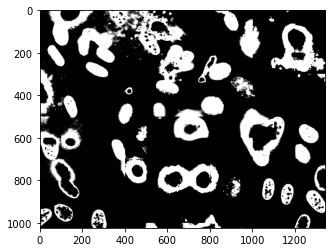

In [28]:
imshow(d3_tllt_m, 'gray')